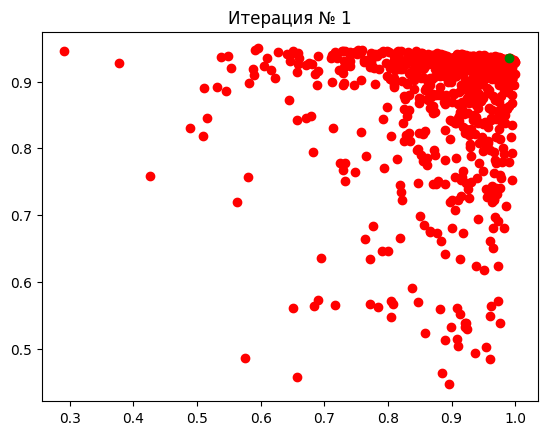

[0.98996008 0.93605545]
[0, 0]


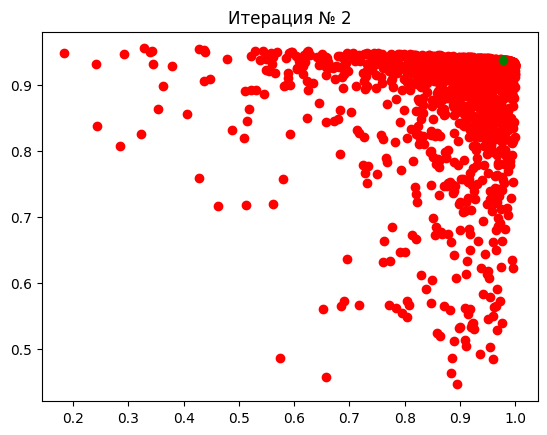

[0.9781995  0.93784174]
[0.98996008 0.93605545]


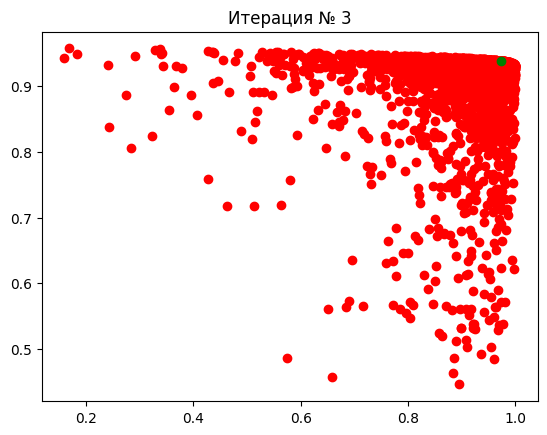

[0.97345523 0.93840208]
[0.9781995  0.93784174]


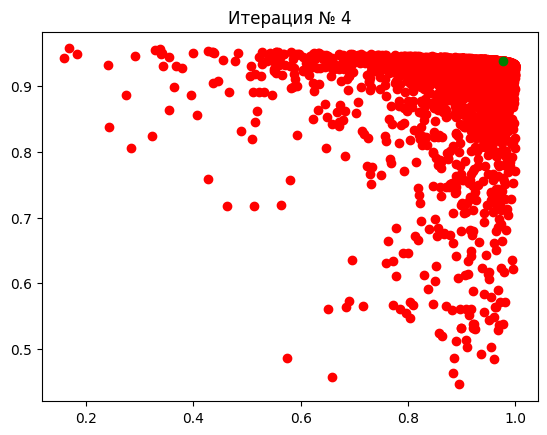

[0.97704745 0.93802702]
[0.97345523 0.93840208]


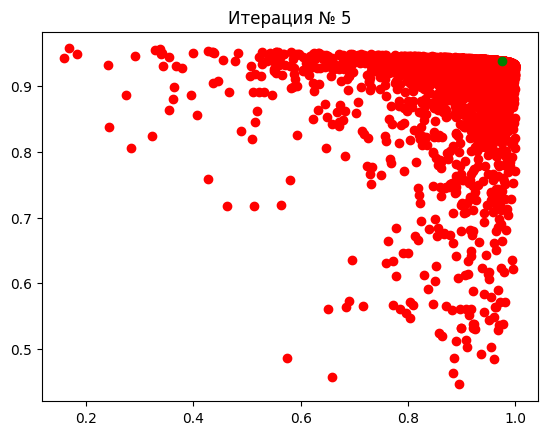

[0.97626336 0.93811907]
[0.97704745 0.93802702]


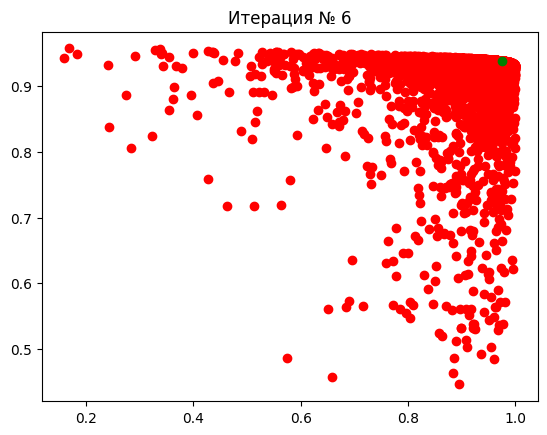

[0.97594579 0.93815478]
[0.97626336 0.93811907]


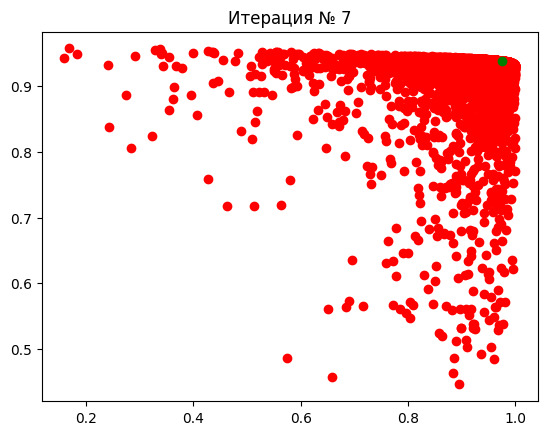

[0.97594579 0.93815478]
[0.97594579 0.93815478]


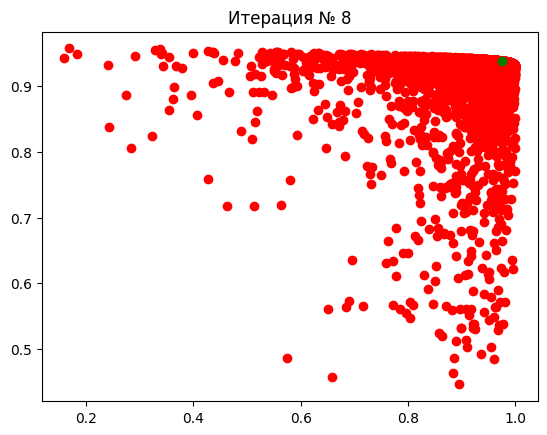

[0.97594579 0.93815478]
[0.97594579 0.93815478]


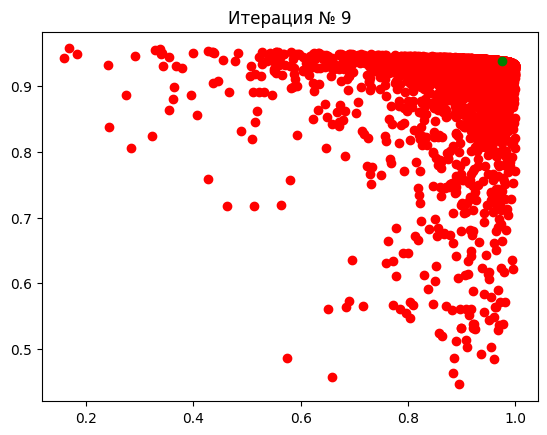

[0.97572233 0.93817966]
[0.97594579 0.93815478]


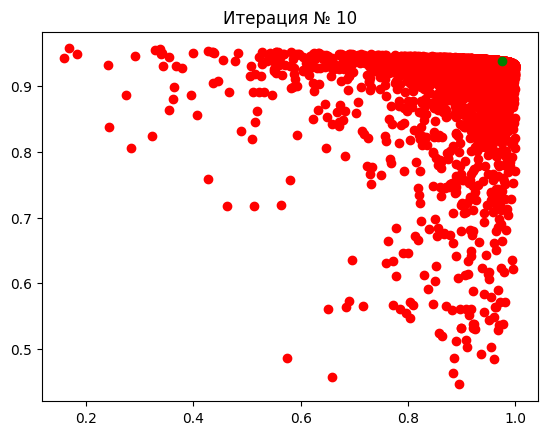

[0.97584075 0.93816659]
[0.97572233 0.93817966]


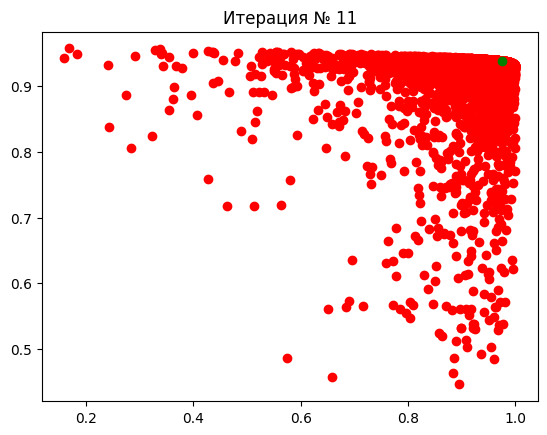

[0.97591267 0.93815862]
[0.97584075 0.93816659]


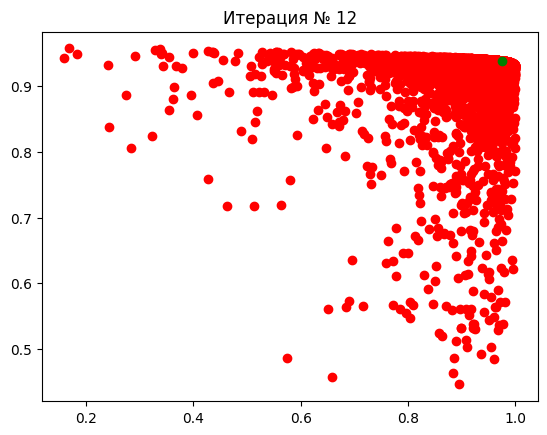

[0.9759523  0.93815423]
[0.97591267 0.93815862]


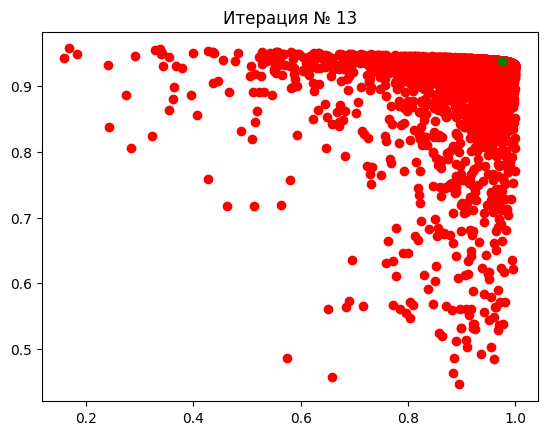

[0.97595072 0.93815441]
[0.9759523  0.93815423]


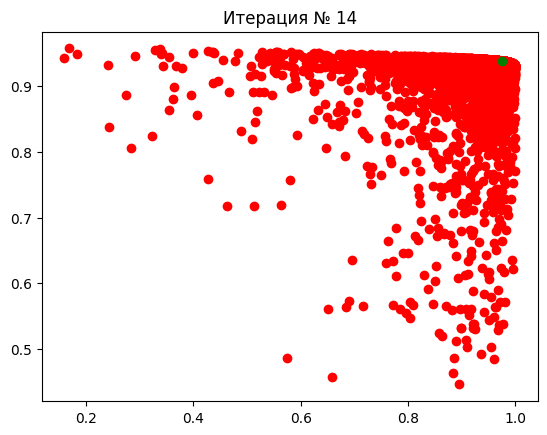

[0.97593104 0.9381566 ]
[0.97595072 0.93815441]


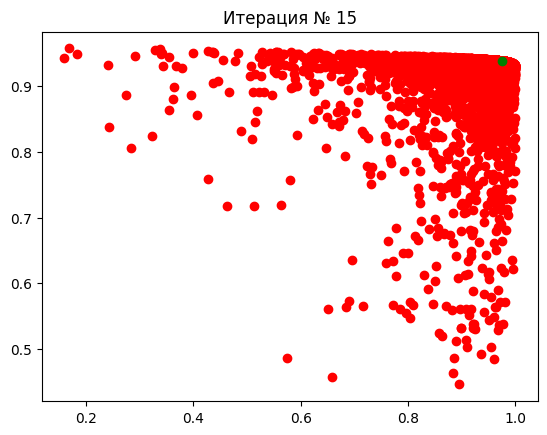

[0.97593104 0.9381566 ]
[0.97593104 0.9381566 ]


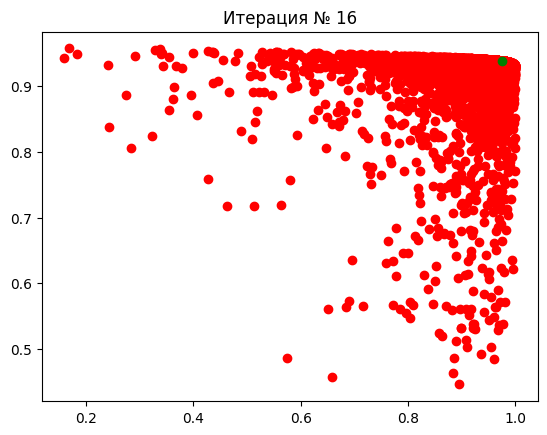

[0.97591468 0.93815842]
[0.97593104 0.9381566 ]


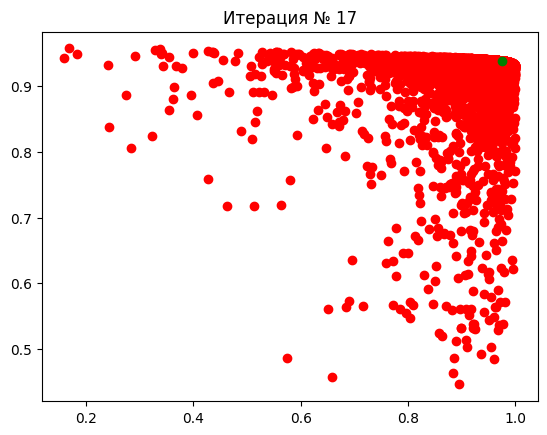

[0.97593139 0.93815656]
[0.97591468 0.93815842]


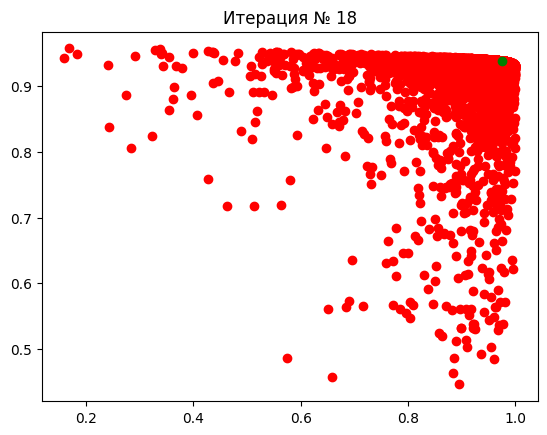

[0.97592468 0.93815731]
[0.97593139 0.93815656]


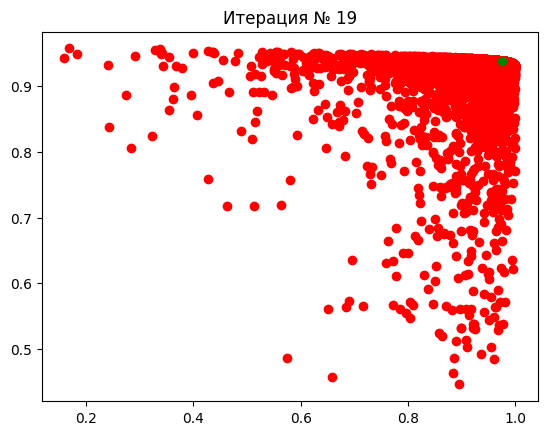

[0.97590988 0.93815895]
[0.97592468 0.93815731]


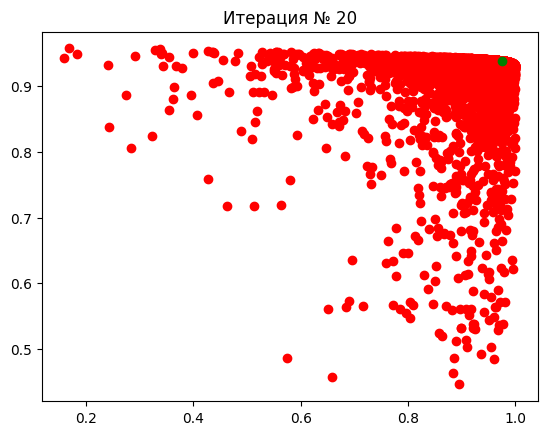

[0.97592114 0.9381577 ]
[0.97590988 0.93815895]


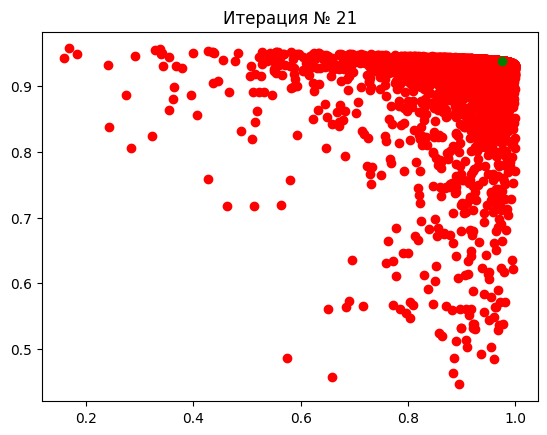

[0.97593157 0.93815654]
[0.97592114 0.9381577 ]


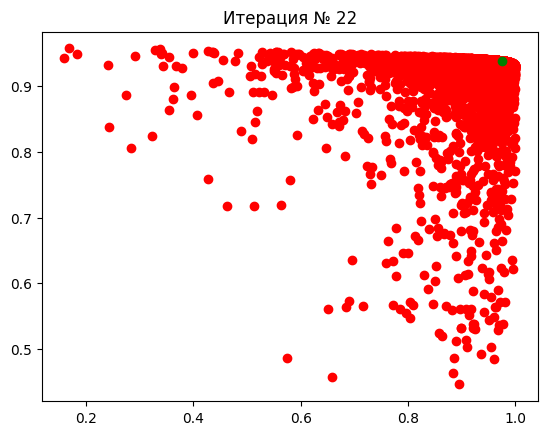

[0.97592589 0.93815717]
[0.97593157 0.93815654]


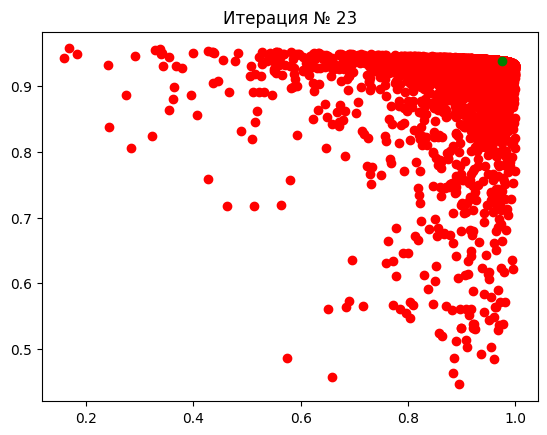

[0.97592297 0.9381575 ]
[0.97592589 0.93815717]


KeyboardInterrupt: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math


bounds = np.array([[-1, 1], [-1, 1], [-1, 1], [-1, 1]])
Pareto = []
colors = ["#FF0000", "#0000FF", "#000000", "#FF00FF", "#00FFFF", "#FF8000", "#800080", "#808000", "#800000", "#008080"]
points1 = []
points2 = []
sum_time = 0

def compute_gradients(points):
    gradients = []
    for i in range(1, len(points) - 1):
        gradient = (points[i + 1] - points[i - 1]) / 2  
        gradients.append(gradient)
    return np.array(gradients)

class Particle:
    def __init__(self, bounds):
        self.position = np.random.uniform(bounds[0][0], bounds[1][1], size=(4,))
        self.velocity = np.random.uniform(-1, 1, size=(4,))
        self.best_position = np.copy(self.position)
        self.best_value = self.evaluate()[0]
        self.fitness_global = self.evaluate()[1]
        self.f = 0
        
    def evaluate(self):
        f1 = (math.sin(self.position[0])*math.cos(self.position[1]**2) + 4*math.cos(self.position[2]**2)+5)/10
        f2 = (math.sin(self.position[2]*self.position[3]) + 6*(math.cos(self.position[3]**2))**3+7)/13.9764
        fitness = a1 * f1 + a2 * f2
        return np.array([f1, f2]), fitness

    def check_constraints(self):
        if (self.position[0] + self.position[1] + self.position[2] - 3 * self.position[3] > 10 or
            self.position[2] - 3 * self.position[3] < -10 or
            pow(self.position[0], 2) + pow(self.position[1], 2) + pow(self.position[2], 2) + pow(self.position[3], 2) > 40):
            self.f = 1
        else:
            self.f = 0
            
    def update(self, global_best_position, global_best_fitness, gradients=None):
        inertia = 0.5 * self.velocity
        cognitive = np.random.rand() * (self.best_position - self.position)
        social = np.random.rand() * (global_best_position - self.position)
        

        if gradients is not None:
            grad_effect = np.mean(gradients, axis=0)  
            self.velocity = inertia + cognitive + social + grad_effect
        else:
            self.velocity = inertia + cognitive + social
            
        self.position += self.velocity
        self.check_constraints()
        
        if self.f == 1:
            self.position -= self.velocity
        else:
            current_value = self.evaluate()[0]
            current_fitness = self.evaluate()[1]
            points1.append(current_value[0])
            points2.append(current_value[1])
            if np.all(current_fitness > self.fitness_global):
                self.best_position = np.copy(self.position)
                self.fitness_global = current_fitness
                self.best_value = current_value

def pso(num_particles, num_iterations, bounds):
    global points1, points2
    points1, points2 = [], []
    global particles 
    particles = [Particle(bounds) for _ in range(num_particles)]
    global_best_position = particles[0].best_position
    global_best_value = particles[0].best_value
    global_best_fitness = particles[0].fitness_global
    cntr = 0
    previous_best_point = [0,0]
    for iteration in range(num_iterations):
        for particle in particles:
            particle.update(global_best_position, global_best_fitness)

            if np.all(particle.fitness_global > global_best_fitness):
                global_best_position = particle.best_position
                global_best_fitness = particle.fitness_global
                global_best_value = particle.best_value
            
        plt.scatter(points1, points2, c=colors[_])
        plt.scatter(global_best_value[0], global_best_value[1], c='g')
        plt.title(f"Итерация № {iteration + 1}")
        plt.show()
        print(global_best_value)
        print(previous_best_point)
        if np.all(global_best_value == previous_best_point):
            cntr+=1
        else:
            cntr = 0
        previous_best_point = global_best_value
        if cntr == 10:
            break
    return global_best_position


for _ in range(9):

    a1 = 0.1*(_+1)
    a2 = 1 - a1
    start_time = time.time()
    
    best_solution = pso(num_particles=1000, num_iterations=50, bounds=bounds)
    

    if len(Pareto) >= 3:
        gradients = compute_gradients(np.array(Pareto))

        for particle in particles:
            particle.update(best_solution, best_solution, gradients)
    print("A1 = ",0.1*(_+1))
    print("A2 = ",1.0-0.1*(_+1))
    print("--- %s seconds ---" % (time.time() - start_time))
    print("Лучшее найденное решение:", best_solution)
    sum_time += (time.time() - start_time)
    Pareto.append(list(best_solution))

print(Pareto)
print("Среднее время: %s seconds" % (sum_time / 10))